# Qu: demo segmentation notebook

## Set up and import

In [1]:
# Import relevant modules
from pathlib import Path

import matplotlib.pyplot as plt
from tifffile import imread
import torch

from qu.data import DataManager
from qu.ml import UNet2DRestorer
from qu.ml import UNet2DRestorerSettings
from qu.demo import get_demo_restoration_dataset

## Prepare the data and the model

In [2]:
# Get the demo dataset
data_root_path = get_demo_restoration_dataset()
print(data_root_path)

# Set the working dir
working_dir = data_root_path

/home/aaron/.qu/data/demo_restoration


In [3]:
# Notice: you can point tensorboard to ${data_root_path}.

In [4]:
# Scan for data
dataManager = DataManager()
dataManager.root_data_path = data_root_path
dataManager.scan()

True

In [5]:
# Report on the experiment type
print(f"Experiment type = {dataManager.experiment_type}")

Experiment type = ExperimentType.REGRESSION


In [6]:
# Summary of found data
print(f"Found {dataManager.num_images} images.")
print(f"Found {dataManager.num_targets} targets.")
print(f"Found {dataManager.num_masks} masks (expected 0).")

Found 90 images.
Found 90 targets.
Found 0 masks (expected 0).


In [7]:
# Split images into training, validation and test set
train_image_names, train_target_names, \
val_image_names, val_target_names, \
test_image_names, test_target_names = dataManager.training_split()

In [8]:
# Report split
print(f"Split: {len(train_image_names)}/{len(val_image_names)}/{len(test_image_names)}")

Split: 67/18/5


Text(0.5, 1.0, 'Target (high quality)')

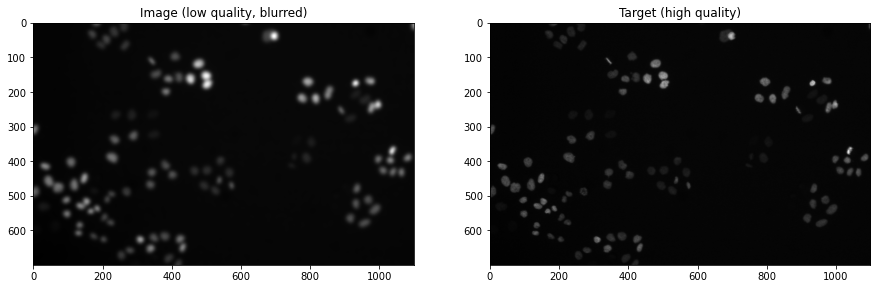

In [9]:
# Show an example pair
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15,10))
ax1.imshow(imread(train_image_names[0]), cmap='gray')
ax1.set_title("Image (low quality, blurred)")
ax2.imshow(imread(train_target_names[0]), cmap='gray')
ax2.set_title("Target (high quality)")

## Set up the Learner

In [10]:
# Check
print(f"Number of input channels: {dataManager.num_input_channels}")
print(f"Number of output channels: {dataManager.num_output_channels}")

Number of input channels: 1
Number of output channels: 1


In [11]:
# Initialize the settings
settings = UNet2DRestorerSettings()

In [12]:
# Change some settings from their default values
settings.roi_size = (512, 512)
settings.batch_sizes = (8, 1, 1, 1)
settings.num_epochs = 800

In [13]:
# Get the settings as dictionary
settings_dict = settings.to_dict()
print(settings_dict)

{'num_epochs': 800, 'validation_step': 2, 'batch_sizes': (8, 1, 1, 1), 'roi_size': (512, 512), 'num_workers': (8, 8, 8, 8), 'sliding_window_batch_size': 4}


In [14]:
# Initialize a mapper (passing the settings dictionary)
mapper = UNet2DRestorer(
    in_channels=dataManager.num_input_channels,
    out_channels=dataManager.num_output_channels,
    **settings_dict,
    working_dir=working_dir
)

In [15]:
# Add the data
mapper.set_training_data(
    train_image_names,
    train_target_names,
    val_image_names,
    val_target_names,
    test_image_names,
    test_target_names
)

## Train the model

In [16]:
# Free GPU memory
torch.cuda.empty_cache()

In [17]:
# Train the model
result = mapper.train()

Using device 'cuda'.
--------------------------------------------------------------------------------
Epoch 1/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.9200
Batch 2/9: train_loss = 0.6493
Batch 3/9: train_loss = 0.5566
Batch 4/9: train_loss = 0.5221
Batch 5/9: train_loss = 0.5036
Batch 6/9: train_loss = 0.4907
Batch 7/9: train_loss = 0.4805
Batch 8/9: train_loss = 0.4712
Batch 9/9: train_loss = 0.4625
Average loss = 0.5618
--------------------------------------------------------------------------------
Epoch 2/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.4549
Batch 2/9: train_loss = 0.4475
Batch 3/9: train_loss = 0.4403
Batch 4/9: train_loss = 0.4330
Batch 5/9: train_loss = 0.4264
Batch 6/9: train_loss = 0.4197
Batch 7/9: train_loss = 0.4133
Batch 8/9: train_loss = 0.4071
Batch 9/9: train_loss = 0.4013
Average loss = 0.4271
-----------------------------

Batch 3/9: train_loss = 0.0362
Batch 4/9: train_loss = 0.0348
Batch 5/9: train_loss = 0.0335
Batch 6/9: train_loss = 0.0321
Batch 7/9: train_loss = 0.0309
Batch 8/9: train_loss = 0.0297
Batch 9/9: train_loss = 0.0285
Average loss = 0.0336
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0267 
New lowest validation loss = 0.0267 at epoch: 14
Saved best model 'best_model_20210122_174205.pth'
--------------------------------------------------------------------------------
Epoch 15/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0274
Batch 2/9: train_loss = 0.0263
Batch 3/9: train_loss = 0.0254
Batch 4/9: train_loss = 0.0244
Batch 5/9: train_loss = 0.0234
Batch 6/9: train_loss = 0.0225
Batch 7/9: train_loss = 0.0216
Batch 8/9: train_loss = 0.0208
Batch 9/9: train_loss = 0.0200
Average l

Batch 1/9: train_loss = 0.0007
Batch 2/9: train_loss = 0.0007
Batch 3/9: train_loss = 0.0007
Batch 4/9: train_loss = 0.0007
Batch 5/9: train_loss = 0.0007
Batch 6/9: train_loss = 0.0006
Batch 7/9: train_loss = 0.0006
Batch 8/9: train_loss = 0.0006
Batch 9/9: train_loss = 0.0006
Average loss = 0.0007
--------------------------------------------------------------------------------
Epoch 28/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0006
Batch 2/9: train_loss = 0.0006
Batch 3/9: train_loss = 0.0006
Batch 4/9: train_loss = 0.0006
Batch 5/9: train_loss = 0.0006
Batch 6/9: train_loss = 0.0006
Batch 7/9: train_loss = 0.0006
Batch 8/9: train_loss = 0.0006
Batch 9/9: train_loss = 0.0005
Average loss = 0.0006
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0004 
New lowest validation lo

Batch 8/9: train_loss = 0.0003
Batch 9/9: train_loss = 0.0003
Average loss = 0.0003
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0002 
New lowest validation loss = 0.0002 at epoch: 40
Saved best model 'best_model_20210122_174205.pth'
--------------------------------------------------------------------------------
Epoch 41/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0003
Batch 2/9: train_loss = 0.0003
Batch 3/9: train_loss = 0.0003
Batch 4/9: train_loss = 0.0003
Batch 5/9: train_loss = 0.0003
Batch 6/9: train_loss = 0.0003
Batch 7/9: train_loss = 0.0003
Batch 8/9: train_loss = 0.0003
Batch 9/9: train_loss = 0.0003
Average loss = 0.0003
--------------------------------------------------------------------------------
Epoch 42/800
------------------------------------------------

Batch 6/9: train_loss = 0.0003
Batch 7/9: train_loss = 0.0003
Batch 8/9: train_loss = 0.0003
Batch 9/9: train_loss = 0.0003
Average loss = 0.0003
--------------------------------------------------------------------------------
Epoch 54/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0003
Batch 2/9: train_loss = 0.0003
Batch 3/9: train_loss = 0.0003
Batch 4/9: train_loss = 0.0003
Batch 5/9: train_loss = 0.0003
Batch 6/9: train_loss = 0.0003
Batch 7/9: train_loss = 0.0003
Batch 8/9: train_loss = 0.0003
Batch 9/9: train_loss = 0.0003
Average loss = 0.0003
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0002 
New lowest validation loss = 0.0002 at epoch: 54
Saved best model 'best_model_20210122_174205.pth'
--------------------------------------------------------------------------------

Validation loss = 0.0002 
--------------------------------------------------------------------------------
Epoch 67/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0003
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0002
Batch 7/9: train_loss = 0.0002
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0002
--------------------------------------------------------------------------------
Epoch 68/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0002
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0002
Batch 7/9: train_loss = 0.0002
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0002
----------------------

Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0002
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0002 
New lowest validation loss = 0.0002 at epoch: 80
Saved best model 'best_model_20210122_174205.pth'
--------------------------------------------------------------------------------
Epoch 81/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0002
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0002
Batch 7/9: train_loss = 0.0002
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0002
--------------------------------------------------------------------------------
Epoch 82/800
------------------------------------------------

Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0002
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0002
Batch 7/9: train_loss = 0.0002
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0002
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0002 
--------------------------------------------------------------------------------
Epoch 95/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0002
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0002
Batch 7/9: train_loss = 0.0002
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0002
------------------------

Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0002
--------------------------------------------------------------------------------
Epoch 108/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0002
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0002
Batch 7/9: train_loss = 0.0002
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0002
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
New lowest validation loss = 0.0001 at epoch: 108
Saved best model 'best_model_20210122_174205.pth'
--------------------------------------------------------------------------------
Epoch 109/800
---------------------------------------------

Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0002
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0002
Batch 7/9: train_loss = 0.0002
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0002
--------------------------------------------------------------------------------
Epoch 122/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0002
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0002
Batch 7/9: train_loss = 0.0002
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0002
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
-----------------------

Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0002
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0002
Batch 7/9: train_loss = 0.0002
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0002
--------------------------------------------------------------------------------
Epoch 136/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0002
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0002
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
New lowest validation l

Validation loss = 0.0001 
New lowest validation loss = 0.0001 at epoch: 148
Saved best model 'best_model_20210122_174205.pth'
--------------------------------------------------------------------------------
Epoch 149/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0002
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 150/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0002
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0002
Batch 7/9: train_loss = 0.0002
Batc

Batch 1/9: train_loss = 0.0004
Batch 2/9: train_loss = 0.0004
Batch 3/9: train_loss = 0.0004
Batch 4/9: train_loss = 0.0004
Batch 5/9: train_loss = 0.0003
Batch 6/9: train_loss = 0.0003
Batch 7/9: train_loss = 0.0002
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0003
--------------------------------------------------------------------------------
Epoch 164/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0002
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0002
Batch 7/9: train_loss = 0.0002
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0002
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
-----------------------

Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0002
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 178/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0003
Batch 2/9: train_loss = 0.0003
Batch 3/9: train_loss = 0.0003
Batch 4/9: train_loss = 0.0004
Batch 5/9: train_loss = 0.0003
Batch 6/9: train_loss = 0.0003
Batch 7/9: train_loss = 0.0003
Batch 8/9: train_loss = 0.0003
Batch 9/9: train_loss = 0.0002
Average loss = 0.0003
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0002 
-----------------------

Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 192/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
New lowest validation l

Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 206/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
-----------------------

Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 220/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
New lowest validation l

Validation loss = 0.0004 
--------------------------------------------------------------------------------
Epoch 233/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0005
Batch 2/9: train_loss = 0.0005
Batch 3/9: train_loss = 0.0003
Batch 4/9: train_loss = 0.0004
Batch 5/9: train_loss = 0.0004
Batch 6/9: train_loss = 0.0003
Batch 7/9: train_loss = 0.0003
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0003
Average loss = 0.0004
--------------------------------------------------------------------------------
Epoch 234/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0002
Batch 2/9: train_loss = 0.0002
Batch 3/9: train_loss = 0.0002
Batch 4/9: train_loss = 0.0002
Batch 5/9: train_loss = 0.0002
Batch 6/9: train_loss = 0.0002
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0002
Batch 9/9: train_loss = 0.0001
Average loss = 0.0002
--------------------

Validation loss = 0.0001 
New lowest validation loss = 0.0001 at epoch: 246
Saved best model 'best_model_20210122_174205.pth'
--------------------------------------------------------------------------------
Epoch 247/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 248/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batc

Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 261/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 262/800
----------------------------------------------------

Validation loss = 0.0001 
--------------------------------------------------------------------------------
Epoch 275/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 276/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------

Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 290/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
-----------------------

Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 304/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
--------------------------------------------------------------------------------
Epoch 305/800
----------------------------------------------------

Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
New lowest validation loss = 0.0000 at epoch: 318
Saved best model 'best_model_20210122_174205.pth'
--------------------------------------------------------------------------------
Epoch 319/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8

Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 332/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 333/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Ba

Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
New lowest validation loss = 0.0000 at epoch: 346
Saved best model 'best_model_20210122_174205.pth'
--------------------------------------------------------------------------------
Epoch 347/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8

Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
New lowest validation loss = 0.0000 at epoch: 360
Saved best model 'best_model_20210122_174205.pth'
--------------------------------------------------------------------------------
Epoch 361/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8

Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 375/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
-----------------------

Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 389/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
------------------------------------------------------

Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 403/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoc

Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 417/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 418/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Ba

Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 431/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 432/800
----------------------------------------------------

Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 445/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoc

Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 459/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 460/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Ba

Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 473/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 474/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Ba

Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 487/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 488/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------

Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 502/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
-----------------------

Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 516/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
--------------------------------------------------------------------------------
Epoch 517/800
----------------------------------------------------

Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 531/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
-----------------------

Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 545/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 546/800
----------------------------------------------------

Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 559/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 560/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------

Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 574/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
-----------------------

Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 588/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 589/800
----------------------------------------------------

Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 602/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 603/800
--------------------------------------------------------------------------------
Ba

Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 617/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0000
-----------------------

Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 631/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
------------------------------------------------------

Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 645/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 646/800
--------------------------------------------------------------------------------
Ba

Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 659/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 660/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Ba

Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 673/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 674/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------

Validation loss = 0.0000 
--------------------------------------------------------------------------------
Epoch 687/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 688/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------

Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 702/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0000 
-----------------------

Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0000
Batch 7/9: train_loss = 0.0000
Batch 8/9: train_loss = 0.0000
Batch 9/9: train_loss = 0.0000
Average loss = 0.0000
--------------------------------------------------------------------------------
Epoch 716/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0000
Batch 2/9: train_loss = 0.0000
Batch 3/9: train_loss = 0.0000
Batch 4/9: train_loss = 0.0000
Batch 5/9: train_loss = 0.0000
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
--------------------------------------------------------------------------------
Epoch 717/800
----------------------------------------------------

Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
--------------------------------------------------------------------------------
Epoch 731/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
-----------------------

Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
--------------------------------------------------------------------------------
Epoch 745/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 746/800
----------------------------------------------------

Validation loss = 0.0001 
--------------------------------------------------------------------------------
Epoch 759/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 760/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------

Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 774/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
-----------------------

Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Epoch 788/800
--------------------------------------------------------------------------------
Batch 1/9: train_loss = 0.0001
Batch 2/9: train_loss = 0.0001
Batch 3/9: train_loss = 0.0001
Batch 4/9: train_loss = 0.0001
Batch 5/9: train_loss = 0.0001
Batch 6/9: train_loss = 0.0001
Batch 7/9: train_loss = 0.0001
Batch 8/9: train_loss = 0.0001
Batch 9/9: train_loss = 0.0001
Average loss = 0.0001
--------------------------------------------------------------------------------
Validation
--------------------------------------------------------------------------------
Validation loss = 0.0001 
--------------------------------------------------------------------------------
Epoch 789/800
----------------------------------------------------

In [18]:
if not result:
    print(mapper.get_message())

## Test predict

In [19]:
# Run prediction on the test set
result = mapper.test_predict()

--------------------------------------------------------------------------------
Test prediction
--------------------------------------------------------------------------------
Loaded best metric model /home/aaron/.qu/data/demo_restoration/runs/best_model_20210122_174205.pth.
Saved /home/aaron/.qu/data/demo_restoration/tests/pred_t077.tif
Saved /home/aaron/.qu/data/demo_restoration/tests/pred_t042.tif
Saved /home/aaron/.qu/data/demo_restoration/tests/pred_t022.tif
Saved /home/aaron/.qu/data/demo_restoration/tests/pred_t006.tif
Saved /home/aaron/.qu/data/demo_restoration/tests/pred_t061.tif
Test prediction completed.


In [20]:
if not result:
    print(mapper.get_message())

In [21]:
# Load one of the predicted images for comparison
filename = Path(test_image_names[0]).name.replace('train_', 'pred_')
filename = data_root_path / "tests" / filename
prediction = imread(filename)

Text(0.5, 1.0, 'Prediction')

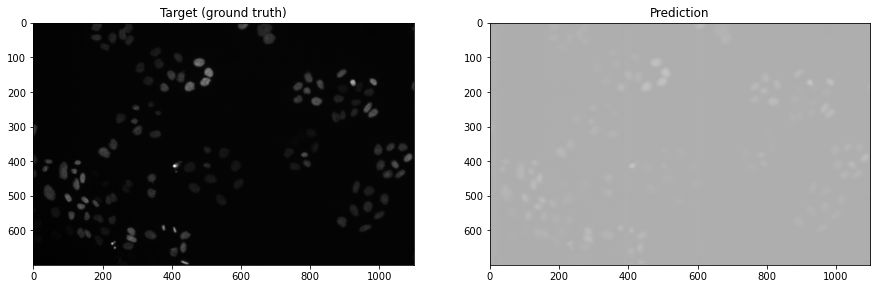

In [22]:
# Show an example test prediction
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15,10))
ax1.imshow(imread(test_target_names[0]), cmap='gray')
ax1.set_title("Target (ground truth)")
ax2.imshow(prediction, cmap='gray')
ax2.set_title("Prediction")

## Predict on new data

In [23]:
# Get path of best model
best_model_path = mapper.get_best_model_path()
print(best_model_path)

/home/aaron/.qu/data/demo_restoration/runs/best_model_20210122_174205.pth


In [24]:
# Just for the sake of example, predict on all images. 
# In practice, you would use brand new images here.
input_folder = Path(data_root_path) / "images"
output_folder = Path(working_dir) / "preds"

result = mapper.predict(input_folder, output_folder, best_model_path)

--------------------------------------------------------------------------------
Prediction
--------------------------------------------------------------------------------
Loaded best metric model /home/aaron/.qu/data/demo_restoration/runs/best_model_20210122_174205.pth.
Saved /home/aaron/.qu/data/demo_restoration/preds/pred_train_t000.tif
Saved /home/aaron/.qu/data/demo_restoration/preds/pred_train_t001.tif
Saved /home/aaron/.qu/data/demo_restoration/preds/pred_train_t002.tif
Saved /home/aaron/.qu/data/demo_restoration/preds/pred_train_t003.tif
Saved /home/aaron/.qu/data/demo_restoration/preds/pred_train_t004.tif
Saved /home/aaron/.qu/data/demo_restoration/preds/pred_train_t005.tif
Saved /home/aaron/.qu/data/demo_restoration/preds/pred_train_t006.tif
Saved /home/aaron/.qu/data/demo_restoration/preds/pred_train_t007.tif
Saved /home/aaron/.qu/data/demo_restoration/preds/pred_train_t008.tif
Saved /home/aaron/.qu/data/demo_restoration/preds/pred_train_t009.tif
Saved /home/aaron/.qu/data/

In [25]:
if not result:
    print(mapper.get_message())